<a href="https://colab.research.google.com/github/Tarane2028/ADS500B/blob/main/Assignment2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the shelter_data.csv file for Q2.1
from google.colab import files
uploaded = files.upload()
import pandas as pd
shelter_data = pd.read_csv('shelter_data.csv')
# Display the first few rows of the dataset to understand its structure
shelter_data.head()

Saving shelter_data.csv to shelter_data (4).csv


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


<ipython-input-8-66877717e9ef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_data_clean[column] = le.fit_transform(shelter_data_clean[column])
<ipython-input-8-66877717e9ef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_data_clean[column] = le.fit_transform(shelter_data_clean[column])
<ipython-input-8-66877717e9ef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

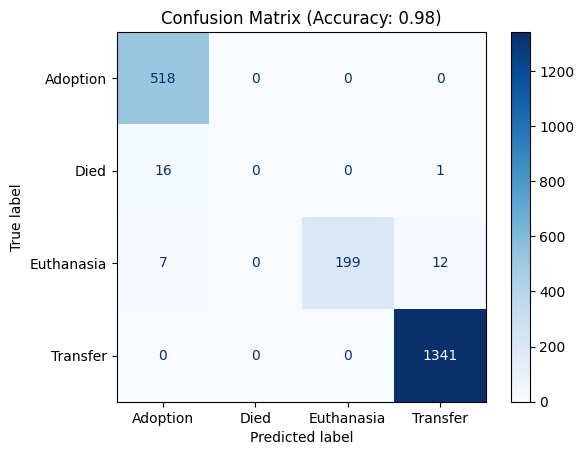

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Drop rows with missing values
shelter_data_clean = shelter_data.dropna()

# Encode categorical variables
label_encoders = {}
for column in shelter_data_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    shelter_data_clean[column] = le.fit_transform(shelter_data_clean[column])
    label_encoders[column] = le

# Define features and target
X = shelter_data_clean.drop(columns='OutcomeType')
y = shelter_data_clean['OutcomeType']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoders['OutcomeType'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

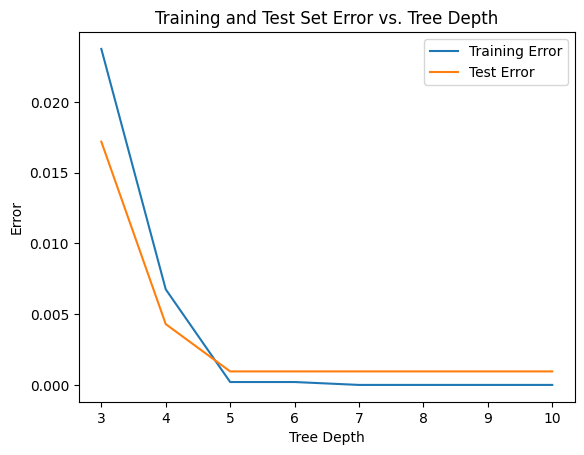

In [ ]:
train_errors = []
test_errors = []
depth_range = range(3, 11)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_errors.append(1 - accuracy_score(y_train, train_pred))
    test_errors.append(1 - accuracy_score(y_test, test_pred))

plt.plot(depth_range, train_errors, label='Training Error')
plt.plot(depth_range, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.legend()
plt.title('Training and Test Set Error vs. Tree Depth')
plt.show()

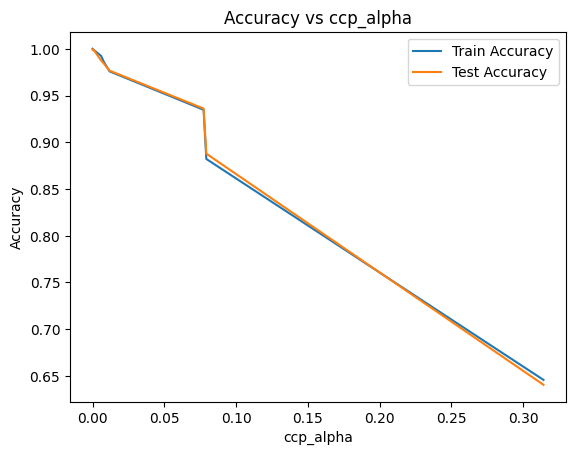

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train decision trees using different values of ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Get accuracy for each pruned tree
train_acc = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_acc = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot accuracy vs ccp_alpha
plt.plot(ccp_alphas, train_acc, label='Train Accuracy')
plt.plot(ccp_alphas, test_acc, label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs ccp_alpha')
plt.show()

<ipython-input-14-fbf25546b283>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_data_clean[column] = le.fit_transform(shelter_data_clean[column])
<ipython-input-14-fbf25546b283>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_data_clean[column] = le.fit_transform(shelter_data_clean[column])
<ipython-input-14-fbf25546b283>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

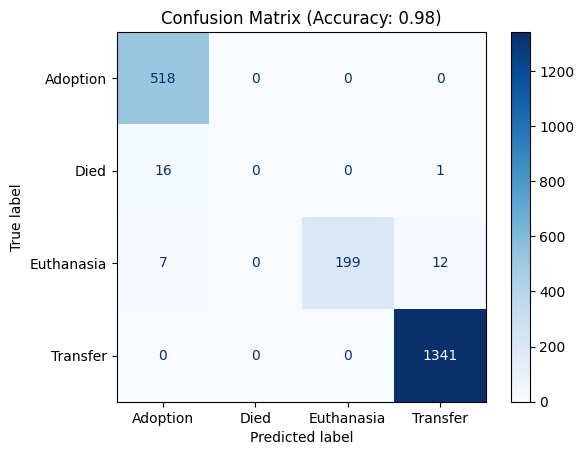

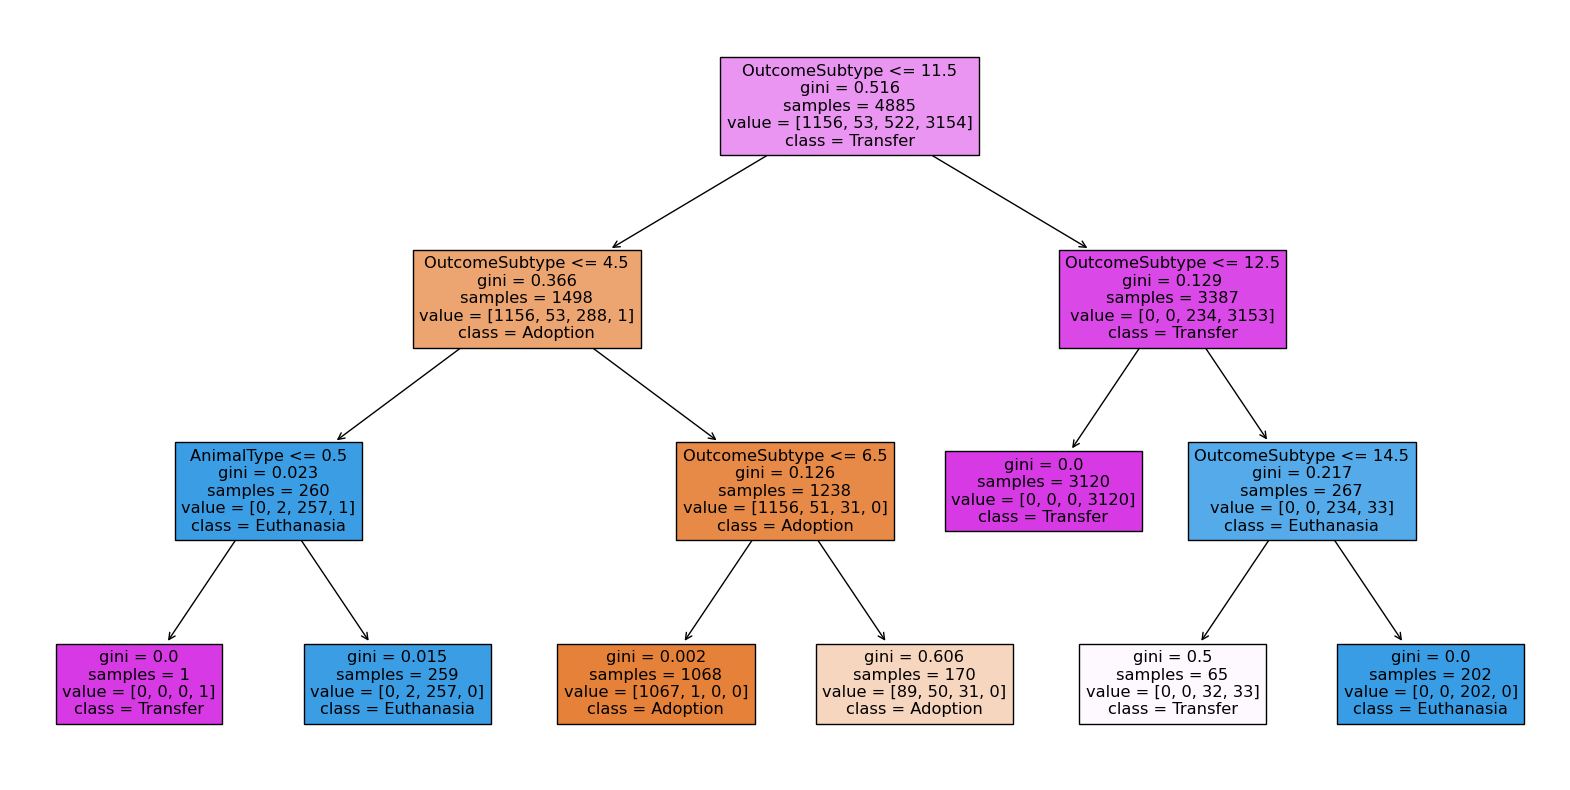

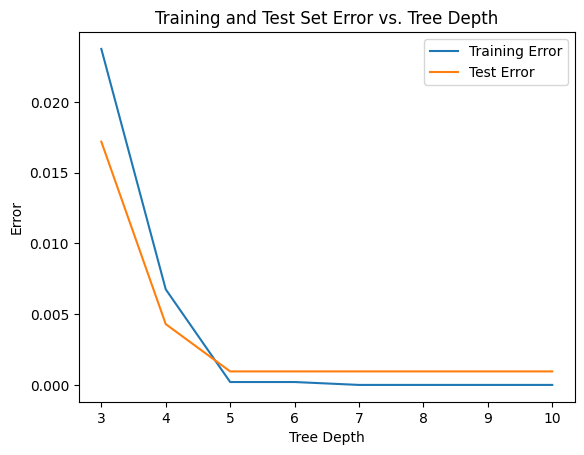

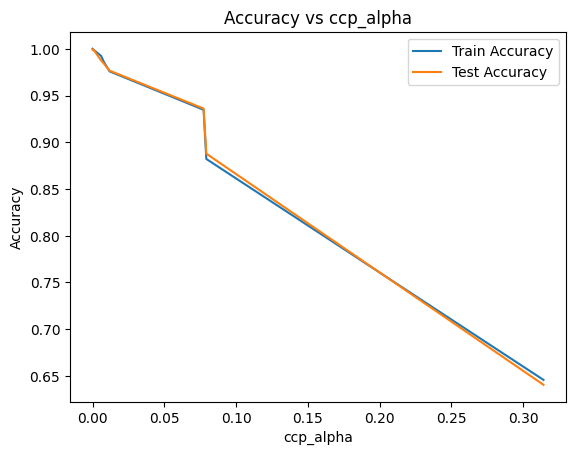

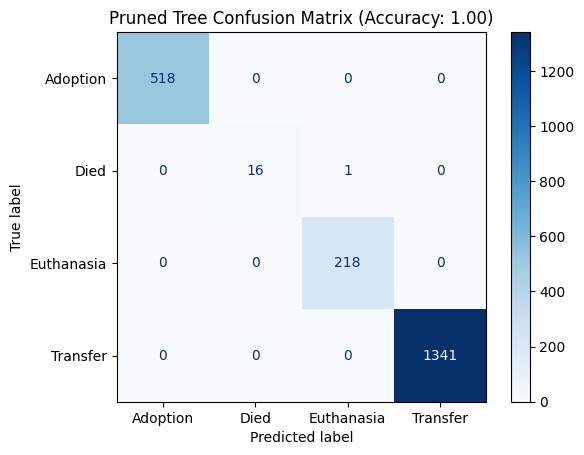

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Drop rows with missing values
shelter_data_clean = shelter_data.dropna()

# Encode categorical variables
label_encoders = {}
for column in shelter_data_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    shelter_data_clean[column] = le.fit_transform(shelter_data_clean[column])
    label_encoders[column] = le

# Define features and target
X = shelter_data_clean.drop(columns='OutcomeType')
y = shelter_data_clean['OutcomeType']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoders['OutcomeType'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['OutcomeType'].classes_)
plt.show()

# Experimenting with tree depth
train_errors = []
test_errors = []
depth_range = range(3, 11)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_errors.append(1 - accuracy_score(y_train, train_pred))
    test_errors.append(1 - accuracy_score(y_test, test_pred))

plt.plot(depth_range, train_errors, label='Training Error')
plt.plot(depth_range, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.legend()
plt.title('Training and Test Set Error vs. Tree Depth')
plt.show()

# Pruning the decision tree
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train decision trees using different values of ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Get accuracy for each pruned tree
train_acc = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_acc = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot accuracy vs ccp_alpha
plt.plot(ccp_alphas, train_acc, label='Train Accuracy')
plt.plot(ccp_alphas, test_acc, label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs ccp_alpha')
plt.show()

# Choose the best pruned tree and plot its confusion matrix
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
best_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_clf.fit(X_train, y_train)
y_pred_pruned = best_clf.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)

disp_pruned = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_pruned, display_labels=label_encoders['OutcomeType'].classes_)
disp_pruned.plot(cmap=plt.cm.Blues)
plt.title(f"Pruned Tree Confusion Matrix (Accuracy: {accuracy_pruned:.2f})")
plt.show()

In [ ]:
#load the data set for Q2.2
from google.colab import files
uploaded = files.upload()

Saving text_data.csv to text_data.csv


In [ ]:
text_data = pd.read_csv('text_data.csv')

# Display the first few rows of the dataset to understand its structure
text_data.head()

,Unnamed: 0,meta_author,meta_title,000,10,11,13,136,13th,1648,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,0,hamilton,general introduction for the independent journ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,1,jay,concerning dangers from foreign force and infl...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [ ]:
print(text_data.columns)

Index(['Unnamed: 0', 'meta_author', 'meta_title', '000', '10', '11', '13',
       '136', '13th', '1648',
       ...
       'yielding', 'yoke', 'yokes', 'york', 'young', 'yourselves', 'zaleucus',
       'zeal', 'zealand', 'zealous'],
      dtype='object', length=8563)


000           int64
10            int64
11            int64
13            int64
136           int64
              ...  
yourselves    int64
zaleucus      int64
zeal          int64
zealand       int64
zealous       int64
Length: 8560, dtype: object


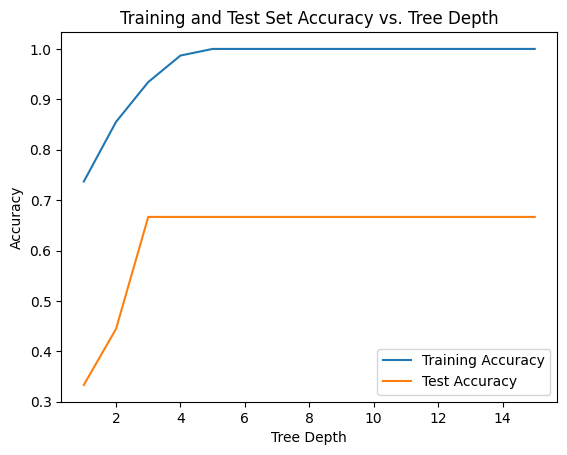

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming the last column is the target and all other columns are features
# If the features are all in one column (text), and the target is in another column
text_columns = text_data.columns.drop(['Unnamed: 0', 'meta_author', 'meta_title'])
X = text_data[text_columns]
y = text_data['meta_author']

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any columns with non-numeric values
X = X.dropna(axis=1, how='any')

# Verify the data types again to ensure all are numeric
print(X.dtypes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

train_accuracies = []
test_accuracies = []
depth_range = range(1, 16)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Set Accuracy vs. Tree Depth')
plt.show()

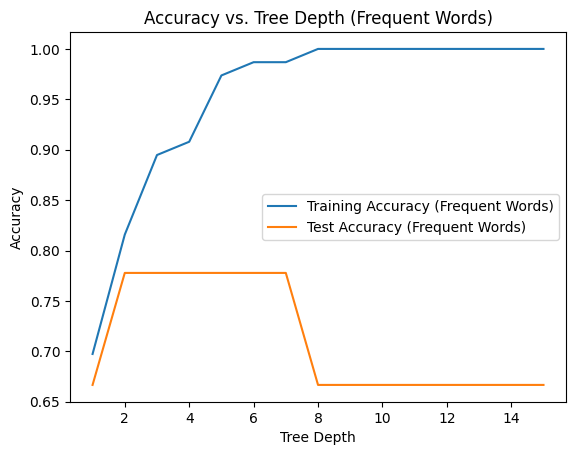

In [ ]:
# Find the most frequently used words (appearing more than 100 times)
word_counts = X.sum(axis=0).astype(int)
frequent_words = word_counts[word_counts > 100].index

# Filter the dataset to include only the frequent words
X_frequent = X[frequent_words]

# Split the data into training and test sets
X_train_frequent, X_test_frequent, y_train, y_test = train_test_split(X_frequent, y, test_size=0.10, random_state=42)

# Train and evaluate decision tree with frequent words
train_accuracies_frequent = []
test_accuracies_frequent = []

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_frequent, y_train)

    train_pred_frequent = clf.predict(X_train_frequent)
    test_pred_frequent = clf.predict(X_test_frequent)

    train_accuracies_frequent.append(accuracy_score(y_train, train_pred_frequent))
    test_accuracies_frequent.append(accuracy_score(y_test, test_pred_frequent))

plt.plot(depth_range, train_accuracies_frequent, label='Training Accuracy (Frequent Words)')
plt.plot(depth_range, test_accuracies_frequent, label='Test Accuracy (Frequent Words)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Tree Depth (Frequent Words)')
plt.show()

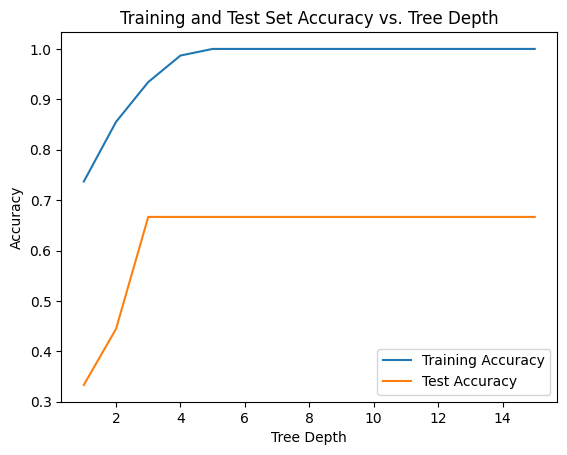

In [ ]:
# Experimenting with tree depth
train_accuracies = []
test_accuracies = []
depth_range = range(1, 16)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Set Accuracy vs. Tree Depth')
plt.show()

In [ ]:
# Results obtained from varying tree depth using entire vocabulary
train_accuracies
test_accuracies
# Results obtained from varying tree depth using frequent words
train_accuracies_frequent
test_accuracies_frequent


[0.6666666666666666,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

In [ ]:
#load the data set for Q2.3
from google.colab import files
import pandas as pd
uploaded  = files.upload()
audio_data = pd.read_csv('audio_data.csv')
audio_data.head()

Saving audio_data.csv to audio_data.csv


,Unnamed: 0,filename,label_text,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,0,70Funk.wav,snare,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,1,8oh8 Rim.wav,snare,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09
2,2,8oh8 Tin.wav,snare,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,...,0.000633,0.000391,0.000169,0.000128,0.000074,0.000024,0.000003,7.285032e-07,7.223851e-08,2.491626e-09
3,3,8oh8 Snr.wav,snare,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,...,0.004249,0.002850,0.001079,0.000781,0.000527,0.000161,0.000024,5.044927e-06,5.018216e-07,5.197483e-08
4,4,9oh9 Rim.wav,snare,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,...,0.000267,0.000211,0.000077,0.000065,0.000033,0.000008,0.000003,7.358946e-07,4.149365e-08,3.860568e-09


In [ ]:
print(audio_data.dtypes)
# Drop non-numeric columns
X = audio_data.drop(columns=['Unnamed: 0', 'filename', 'label_text', 'label'])
y = audio_data['label']

# Verify the data types again
print(X.dtypes)
print(y.dtypes)

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any columns with non-numeric values
X = X.dropna(axis=1, how='any')

# Verify the data types again to ensure all are numeric
print(X.dtypes)

Unnamed: 0       int64
filename        object
label_text      object
label            int64
0.00 hz        float64
                ...   
10680.47 hz    float64
10766.60 hz    float64
10852.73 hz    float64
10938.87 hz    float64
11025.00 hz    float64
Length: 133, dtype: object
0.00 hz        float64
86.13 hz       float64
172.27 hz      float64
258.40 hz      float64
344.53 hz      float64
                ...   
10680.47 hz    float64
10766.60 hz    float64
10852.73 hz    float64
10938.87 hz    float64
11025.00 hz    float64
Length: 129, dtype: object
int64
0.00 hz        float64
86.13 hz       float64
172.27 hz      float64
258.40 hz      float64
344.53 hz      float64
                ...   
10680.47 hz    float64
10766.60 hz    float64
10852.73 hz    float64
10938.87 hz    float64
11025.00 hz    float64
Length: 129, dtype: object


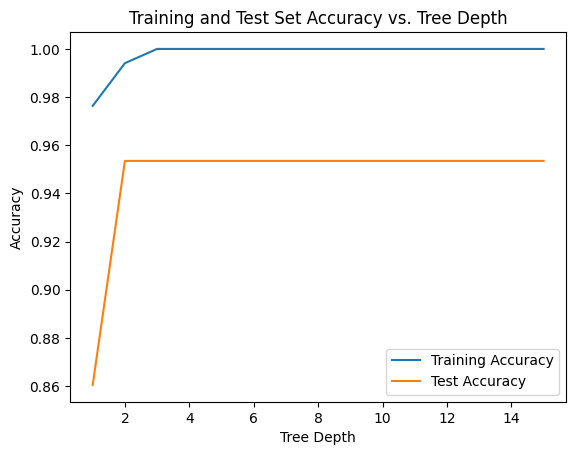

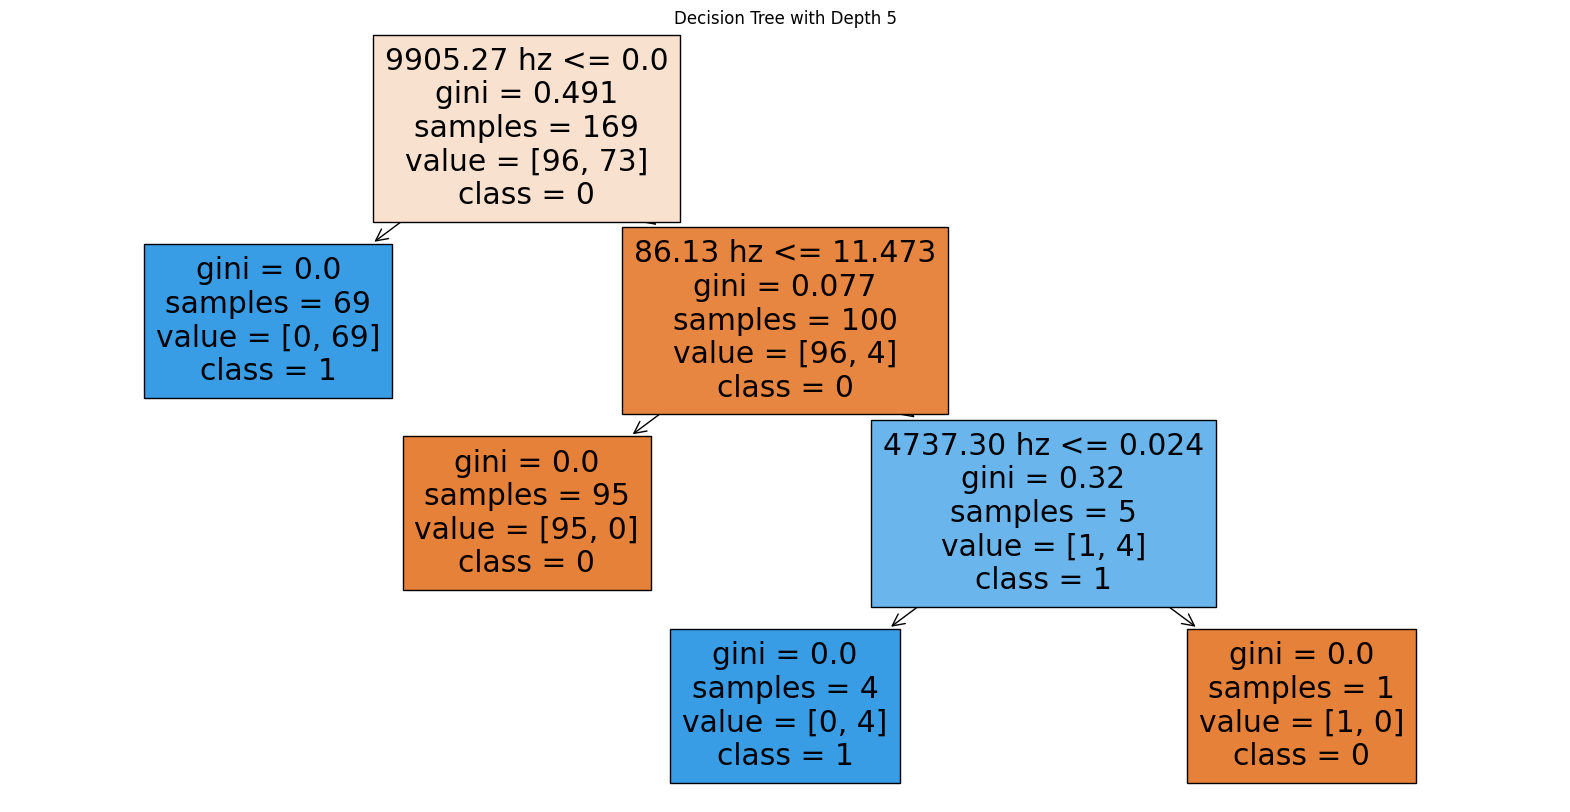

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data into training and test sets with test size of 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Experimenting with tree depth
train_accuracies = []
test_accuracies = []
depth_range = range(1, 16)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Set Accuracy vs. Tree Depth')
plt.show()

# Set the depth of the tree to 5 and plot the tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(c) for c in clf.classes_])
plt.title("Decision Tree with Depth 5")
plt.show()

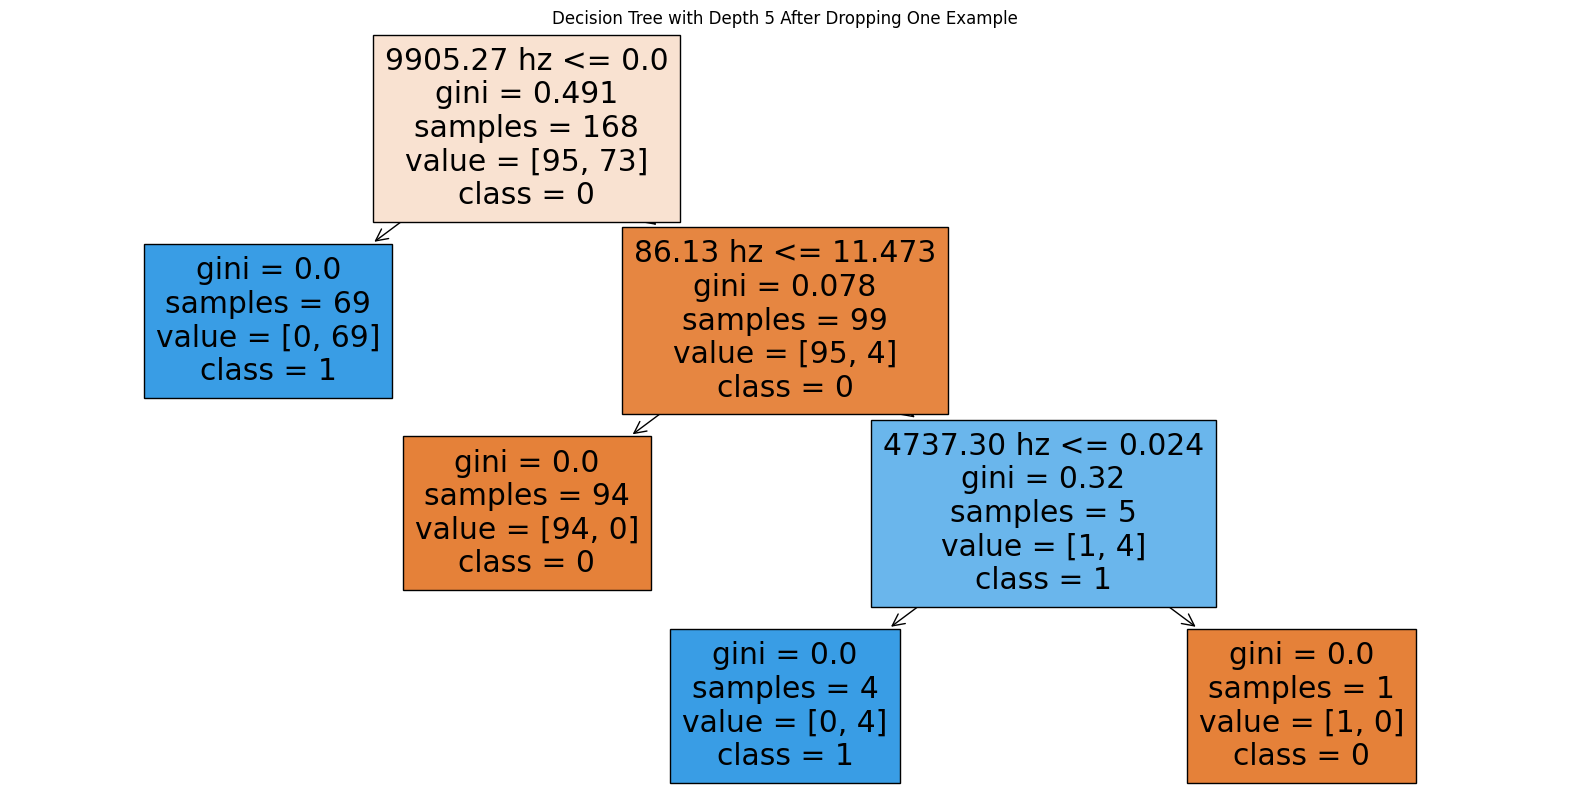

In [ ]:
# Drop one training example
X_train_dropped = X_train.drop(1)
y_train_dropped = y_train.drop(1)

# Re-train the decision tree with the modified training set
clf_dropped = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_dropped.fit(X_train_dropped, y_train_dropped)

# Plot the tree after dropping one example
plt.figure(figsize=(20,10))
plot_tree(clf_dropped, filled=True, feature_names=X.columns, class_names=[str(c) for c in clf.classes_])
plt.title("Decision Tree with Depth 5 After Dropping One Example")
plt.show()

In [ ]:
#load audio_data again for Q3
print(audio_data.head())
print(audio_data.dtypes)

   Unnamed: 0       filename label_text  label   0.00 hz  86.13 hz  172.27 hz  \
0           0     70Funk.wav      snare      0  0.117469  0.201065   3.666227   
1           1  8oh8  Rim.wav      snare      0  0.003148  0.012814   0.375678   
2           2  8oh8  Tin.wav      snare      0  0.006759  0.039368   0.385903   
3           3   8oh8 Snr.wav      snare      0  0.003083  0.001359   0.021241   
4           4   9oh9 Rim.wav      snare      0  0.006571  0.007394   0.033357   

   258.40 hz  344.53 hz  430.66 hz  ...  10249.80 hz  10335.94 hz  \
0   7.554432   5.356165   2.470225  ...     0.000272     0.000199   
1   1.050320   0.164903   0.089524  ...     0.001122     0.000737   
2   0.254091   0.086651   0.137728  ...     0.000633     0.000391   
3   0.053261   0.026645   0.393541  ...     0.004249     0.002850   
4   0.458574   1.056414   0.435841  ...     0.000267     0.000211   

   10422.07 hz  10508.20 hz  10594.34 hz  10680.47 hz  10766.60 hz  \
0     0.000083     0.000071 

In [ ]:
# Drop non-numeric columns
X = audio_data.drop(columns=['Unnamed: 0', 'filename', 'label_text', 'label'])
y = audio_data['label']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any columns with non-numeric values
X = X.dropna(axis=1, how='any')

# Verify the data types again to ensure all are numeric
print(X.dtypes)

0.00 hz        float64
86.13 hz       float64
172.27 hz      float64
258.40 hz      float64
344.53 hz      float64
                ...   
10680.47 hz    float64
10766.60 hz    float64
10852.73 hz    float64
10938.87 hz    float64
11025.00 hz    float64
Length: 129, dtype: object


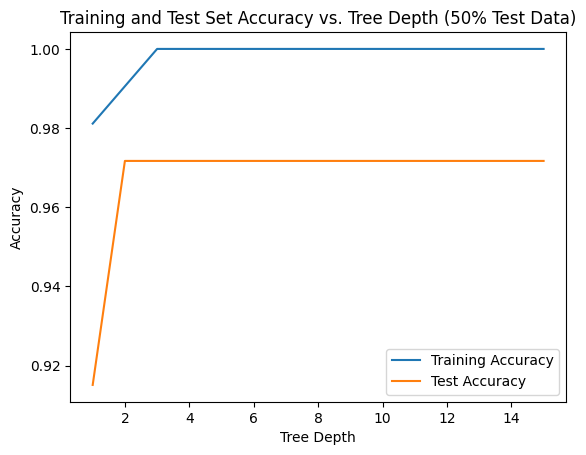

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets with test size of 0.50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Experimenting with tree depth
train_accuracies = []
test_accuracies = []
depth_range = range(1, 16)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Set Accuracy vs. Tree Depth (50% Test Data)')
plt.show()

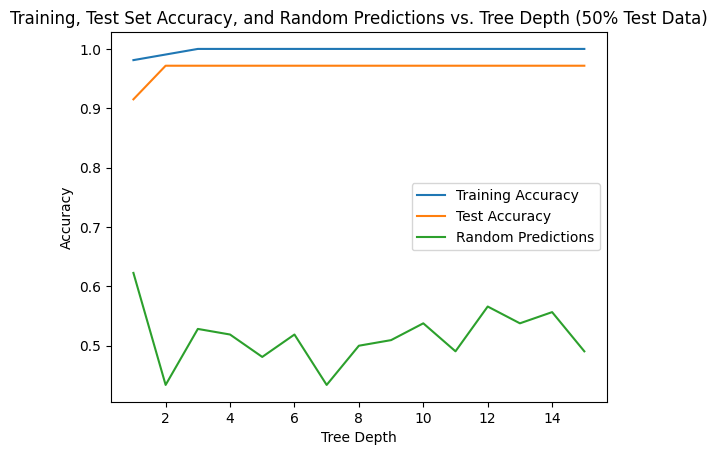

In [ ]:
import numpy as np

class BadClassifiers:
    def fit(self, X, y):
        self.classes_ = np.unique(y)

    def predict(self, X):
        return np.random.choice(self.classes_, size=X.shape[0])

# Initialize and fit the bad classifier
bad_clf = BadClassifiers()
bad_clf.fit(X_train, y_train)
random_accuracies = []

for depth in depth_range:
    random_pred = bad_clf.predict(X_test)
    random_accuracies.append(accuracy_score(y_test, random_pred))

plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, test_accuracies, label='Test Accuracy')
plt.plot(depth_range, random_accuracies, label='Random Predictions')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Test Set Accuracy, and Random Predictions vs. Tree Depth (50% Test Data)')
plt.show()

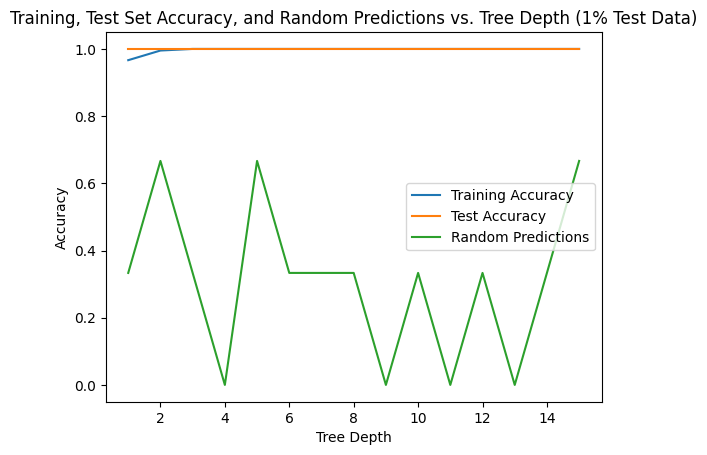

In [ ]:
# Split the data into training and test sets with test size of 0.01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
# Experimenting with tree depth
train_accuracies_small = []
test_accuracies_small = []

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracies_small.append(accuracy_score(y_train, train_pred))
    test_accuracies_small.append(accuracy_score(y_test, test_pred))

random_accuracies_small = []

for depth in depth_range:
    random_pred = bad_clf.predict(X_test)
    random_accuracies_small.append(accuracy_score(y_test, random_pred))

plt.plot(depth_range, train_accuracies_small, label='Training Accuracy')
plt.plot(depth_range, test_accuracies_small, label='Test Accuracy')
plt.plot(depth_range, random_accuracies_small, label='Random Predictions')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Test Set Accuracy, and Random Predictions vs. Tree Depth (1% Test Data)')
plt.show()